<div style="text-align:center"><h1>RGEs of PBH</h1></div>
<div style="text-align:right"><b>Tae Geun Kim</b></div>
******
$$\xi = 59.218982012703925$$

In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from math import exp, log
import ast

# Use latex
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

## 1. Potential
******
### 1) Overview 
#### - Import Data from Mathematica

In [3]:
# Import & Edit data automatically.
tempp = open('/home/rakhan/PBH_data/PoTab.csv')
Datap = [line.strip().strip('"') for line in tempp]
for i, mass_group in enumerate(Datap):
    Datap[i] = ast.literal_eval(mass_group)

# Extract t, $\lambda$
for i in range(len(Datap)):
    locals()['h_'+str(i)] = []
    locals()['VE_'+str(i)] = []
for i, mass_group in enumerate(Datap):
    for values in mass_group:
        locals()['h_'+str(i)].append(values[2])
        locals()['VE_'+str(i)].append(values[3]) 

#### - Plot 

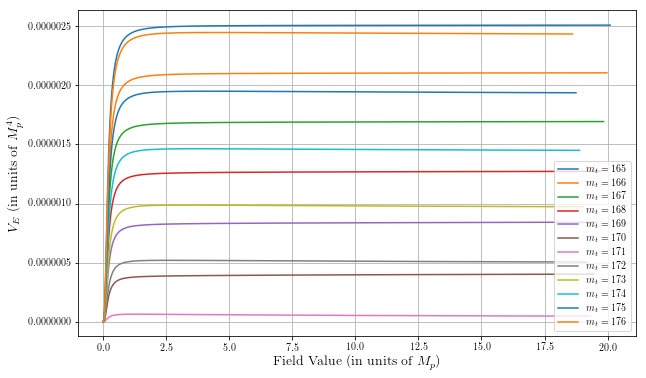

In [4]:
NULLp = [0 for i in h_0]
plt.figure(figsize=(10,6))
for i in range(len(Datap)):
    plt.plot(locals()['h_'+str(i)],locals()['VE_'+str(i)],label=r"$m_t="+str(i+165)+"$")
#plt.plot(tp_0,NULLp,color='black')
plt.xlabel(r'Field Value (in units of $M_p$)', fontsize=14)
plt.ylabel(r'$V_E$ (in units of $M_p^4$)', fontsize=14)
plt.legend()
plt.grid()
plt.show()

#### - Coclusion
* Not Normalized! $\rightarrow$ Should normalized with planck results.
* But we can see shape of graph

### 2) More Specific ($170.844GeV\leq M_t \leq 170.856GeV$) 
#### - Import Data from Mathematica

In [5]:
# Import & Edit data automatically.
temp_pot = open('/home/rakhan/PBH_data/Potential.csv')
Data_pot = [line.strip().strip('"') for line in temp_pot]
for i, mass_group in enumerate(Data_pot):
    Data_pot[i] = ast.literal_eval(mass_group)

# Extract t, $\lambda$
for i in range(len(Data_pot)):
    locals()['hpot_'+str(i)] = []
    locals()['VEpot_'+str(i)] = []
for i, mass_group in enumerate(Data_pot):
    for values in mass_group:
        locals()['hpot_'+str(i)].append(values[2])
        locals()['VEpot_'+str(i)].append(values[3]) 

#### - Plot

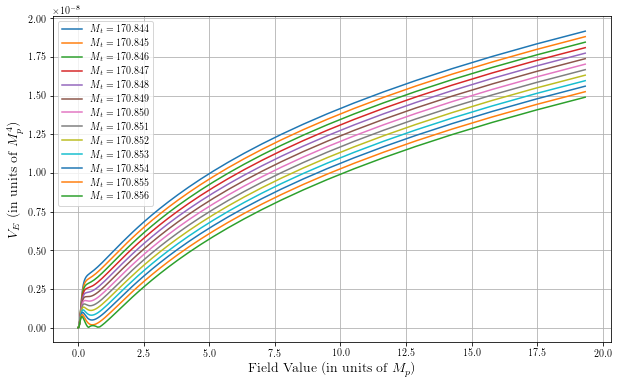

In [6]:
plt.figure(figsize=(10,6))
for i,_ in enumerate(Data_pot):
    if i < 6:
        plt.plot(locals()['hpot_'+str(i)],locals()['VEpot_'+str(i)],label=r'$M_t=170.84'+str(i+4)+'$')
    else:
        plt.plot(locals()['hpot_'+str(i)],locals()['VEpot_'+str(i)],label=r'$M_t=170.85'+str(i-6)+'$')
plt.xlabel(r'Field Value (in units of $M_p$)', fontsize=14)
plt.ylabel(r'$V_E$ (in units of $M_p^4$)', fontsize=14)
plt.legend()
plt.grid()
plt.show()

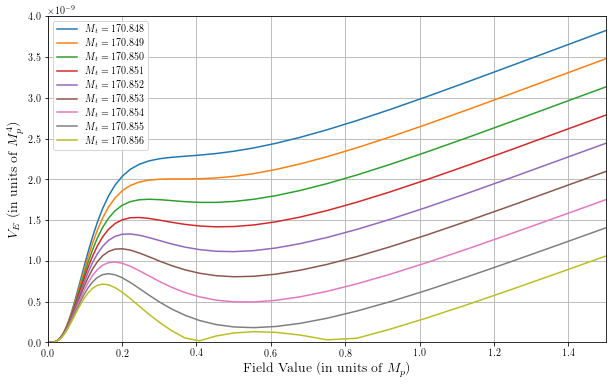

In [7]:
plt.figure(figsize=(10,6))
for i,_ in enumerate(Data_pot):
    if 3 < i < 6:
        plt.plot(locals()['hpot_'+str(i)],locals()['VEpot_'+str(i)],label=r'$M_t=170.84'+str(i+4)+'$')
    elif i >= 6:
        plt.plot(locals()['hpot_'+str(i)],locals()['VEpot_'+str(i)],label=r'$M_t=170.85'+str(i - 6)+'$')
# i = 6 -> 170.849
plt.xlabel(r'Field Value (in units of $M_p$)', fontsize=14)
plt.ylabel(r'$V_E$ (in units of $M_p^4$)', fontsize=14)
plt.legend()
plt.axis([0, 1.5, 0, 0.000000004])
plt.grid()
plt.show()

### 3) See Inflection Point ($M_t = 170.849GeV$)
#### - Derivative

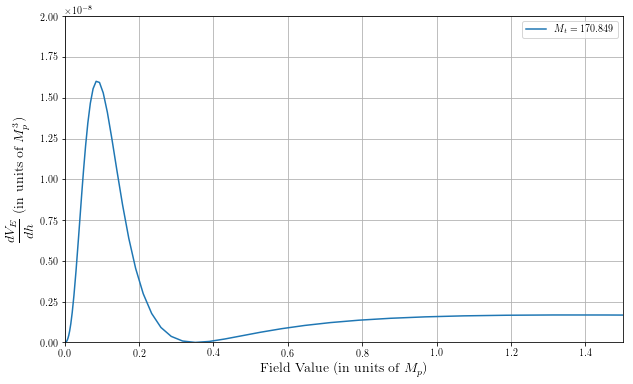

In [8]:
hdpot_5 = [(hpot_5[i] + hpot_5[i+1])/2 for i in range(len(hpot_5)-1)]
VEdpot_5 = np.diff(VEpot_5)/np.diff(hpot_5)
plt.figure(figsize=(10,6))
plt.plot(hdpot_5,VEdpot_5,label=r'$M_t=170.849$')
plt.xlabel(r'Field Value (in units of $M_p$)', fontsize=14)
plt.ylabel(r'$\displaystyle \frac{dV_E}{dh}$ (in units of $M_p^3$)', fontsize=14)
plt.legend()
plt.axis([0, 1.5, 0, 0.00000002])
plt.grid()
plt.show()

In [9]:
for i, elem in enumerate(hdpot_5):
    if VEdpot_5[i] == min(VEdpot_5[298:]):
        print('h =',elem,": V'=",min(VEdpot_5[298:]))
        inflec = elem

h = 0.35119 : V'= 5.33288424835e-12


#### - Inflection Point

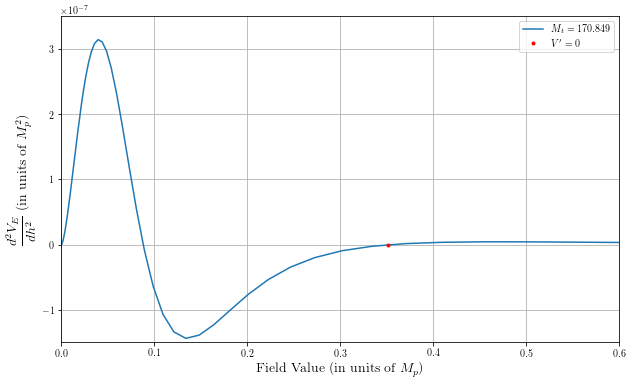

In [10]:
hddpot_5 = [(hdpot_5[i] + hdpot_5[i+1])/2 for i in range(len(hdpot_5)-1)]
VEddpot_5 = np.diff(VEdpot_5)/np.diff(hdpot_5)
plt.figure(figsize=(10,6))
plt.plot(hddpot_5,VEddpot_5,label=r'$M_t=170.849$')
plt.plot(inflec,0,'.',color='red',label=r"$V'=0$")
plt.xlabel(r'Field Value (in units of $M_p$)', fontsize=14)
plt.ylabel(r'$\displaystyle \frac{d^2V_E}{dh^2}$ (in units of $M_p^2$)', fontsize=14)
plt.legend()
plt.axis([0, 0.6, -1.5e-07, 3.5e-07])
plt.grid()
plt.show()

#### - Conclusion
* At $\,M_t = 170.849GeV$, there is an inflection point such that $\,V'=V''=0$.
* Inflection point is $\,h=0.35119$.